# Baseline models & k-Nearest Neighbours

## Lecture Learning Objectives 

- Use `DummyClassifier` and `DummyRegressor` as baselines for machine learning problems.
- Explain the notion of similarity-based algorithms .
- Broadly describe how KNNs use distances.
- Discuss the effect of using a small/large value of the hyperparameter $K$ when using the KNN algorithm 
- Describe the problem of the curse of dimensionality.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeClassifier
import altair as alt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
import os
import sys
sys.path.append(os.path.join(os.path.abspath("."), "code"))
from plotting_functions import *
from utils import *

## Five Minute Recap/ Lightning Questions 

- What are the 4 types of data/splits that we discussed last class?
- What is the "Golden Rule of Machine Learning"?
- What do we use to split our data?
- What is overfitting and underfitting? 

### Some lingering questions

- Are decision trees the most basic model?
- What other models can we build?

## Baseline Models

We saw in the last 2 lectures how to build decision tree models which are based on rules (if-else statements), but how can we be sure that these models are doing a good job besides just accuracy? 

Back in high school in chemistry or biology, we've all likely seen and heard of the "control group" where we have an experimental group, does not receive any experimental treatment.  This control group increases the reliability of the results, often through a comparison between control measurements and the other measurements. 


Our baseline model is something like a control group in the sense that it provides a way to sanity-check your machine learning model. We make baseline models not to use for prediction purposes, but as a reference point when we are building other more sophisticated models.

So what is a baseline model then? 

- Baseline: A simple machine learning algorithm based on simple rules of thumb. For example, 
    - most frequent baseline: always predicts the most frequent label in the training set. 


### Dummy Classifier

We are going to build a most frequent baseline model which always predicts the most frequently labelled in the training set.

In [2]:
# import dataset
voting_df = pd.read_csv('data/cities_USA.csv', index_col=0)
voting_df

,lon,lat,vote
1,-80.162475,25.692104,red
2,-80.214360,25.944083,red
3,-80.094133,26.234314,red
4,-80.248086,26.291902,red
5,-81.789963,26.348035,red
...,...,...,...
396,-97.460476,48.225094,blue
397,-96.551116,48.591592,red
398,-166.519855,53.887114,blue
399,-163.733617,67.665859,blue


In [3]:
# feature table
X = voting_df.drop(columns='vote')

# the target variable
y = voting_df[['vote']]

In [4]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123)

We build our model, in the same way as we built a decision tree model but this time using `DummyClassifier`. 

Since we are using a "most frequent" baseline model, we specify the argument `strategy` as `"most_frequent"`

There are other options that you you read about in the [sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) but you just need to know `most_frequent` for now. 

In [5]:
# create a dummy classifier
dummy_clf = DummyClassifier(strategy="most_frequent")

In the last lecture, we stated that it's at this point that we would usually perform cross-validation
to evaluate the model performance.

With Dummy Classifiers, we won't need to because we are not hyperparameter tuning. We are using this just to get a base training score. 

In [6]:
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_train, y_train)

0.578125

If we see what our model predicts on the feature table for our training split `X_train`, our model will predict the most frequent class from our training data. 

In [7]:
y_train.value_counts()

vote
red     185
blue    135
Name: count, dtype: int64

In [8]:
dummy_clf.predict(X_train)

array(['red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red',

We can also now take the test score. 

In [9]:
dummy_clf.score(X_test, y_test)

0.6125

Here is a good example of when we occasionally have test scores better than the training scores.

In this case, it's higher because our test split has a higher proportion of observations that are of class blue and so more of them will be predicted correctly.

Now if we build a decision tree, we can compare it to the baseline model score.

Here we use cross-validation to score the model although we are not tuning any hyperparameters.
It is general a good idea to get into the habit of doing this for all models except baseline/dummy models,
because the split can influence the model score (this is true to a much lesser extent for baseline models)

In [20]:
# create a decision tree classifier
dt_clf = DecisionTreeClassifier(random_state=42)

# cross validate the decision tree classifier
scores = cross_validate(dt_clf, X_train, y_train, cv=10, return_train_score=True)

# mean score
pd.DataFrame(scores).mean()[-2:]

test_score     0.88125
train_score    1.00000
dtype: float64

In [21]:
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

0.9125

We can see that our decision tree is doing better than a model build on this simple "most frequently" occurring model. 
This makes us trust our model a little more
and we know that it has identified some structure in the data that is more complicated than simply predicting the most common label.
This is especially important if we have an unbalanced training data set with much more of one label than of another,
but there are also more sophisticated strategies to handle that situation,
which we will discuss later.

### Dummy Regressor

For a Dummy regressor, the same principles can be applied but by using different strategies.

[“mean”, “median”, “quantile”, “constant”](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html?highlight=dummyregressor)

The one we are going to become most familiar with is:

**Average (mean) target value:** always predicts the mean of the training set.

In [22]:
house_df = pd.read_csv("data/kc_house_data.csv")
house_df = house_df.drop(columns=["id", "date"])
house_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Let get our `X` and `y` objects and split our data. 

In [23]:
X = house_df.drop(columns=["price"])
y = house_df["price"]

We still need to make sure we split our data with baseline models.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123)

we need to import `DummyRegressor` and construct our model. 

We specify `strategy="mean"` however this is the default value so technically we don't need to specify this. 

We train our model and again, it's not needed to cross-validate for this type of algorithm. 

In [26]:
dummy_reg = DummyRegressor(strategy="mean")
dummy_reg.fit(X_train,y_train)

DummyRegressor()

If we predict on our training data, we see it's making the same prediction for each observation. 

In [27]:
dummy_reg.predict(X_train)

array([539306.46784268, 539306.46784268, 539306.46784268, ...,
       539306.46784268, 539306.46784268, 539306.46784268])

if we compare the mean value of the target, we see that our model is simply predicting the average of the training data which is exactly what we expect. 

In [28]:
y_train.mean()

539306.4678426837

How well does it do? 

In [29]:
dummy_reg.score(X_train, y_train)

0.0

We get an $R^2$ value of 0.0. 

When a model has an  $R^2$=0 that means that the model is doing no better than a model that using the mean which is exactly the case here. 

Looking at the test score we see that our model get's a slightly negative value,
which means that it is doing a little worse than constantly predicting the mean of the test data.

In [30]:
dummy_reg.score(X_test, y_test)

-0.00010814646015933072

## Let's Practice 

1\. Below we have the output of `y_train.value_counts()`

```
Position
Forward     13
Defense      7
Goalie       2
dtype: int64
```

In this scenario, what would a `DummyClassifier(strategy='most_frequent')` model predict on the following observation: 


```
   No.  Age  Height  Weight  Experience     Salary
1   83   34     191     210          11  3200000.0
```

2\. When using a regression model, which of the following is not a possible return value from .score(X,y) ?

a) 0.0    
b) 1.0    
c) -0.1    
d) 1.5    
    
    
3\.  Below are the values for `y` that were used to train  `DummyRegressor(strategy='mean')`:

```
Grade
0     75
1     80
2     90
3     95
4     85
dtype: int64
```

What value will the model predict for every example?


```{admonition} Solutions!
:class: dropdown

1. `Forward`
2. d) 1.5
3. 85
```

## Similarity/analogy-based models

Let's switch topics from baseline models and talked about the concept of similarity based models.

Suppose you are given the following training images with the corresponding actor's name as the label.
Then we are given an unseen test images of the same actors but from different angles and are asked to label a given test example.

An intuitive way to classify the test example is by finding the most "similar" example from the training images and use that label for the test example.  

<img src='imgs/knn-motivation.png' width="100%">

### Example: 

Suppose we are given many images and their labels.

`X` = set of pictures 

`y` = names associated with those pictures. 

Then we are given a new unseen test example, a picture in this particular case.


<img src='imgs/test_pic.png' width="5%">


We want to find out the label for this new test picture. 

Naturally, we would try and find the most similar picture in our training set and using the label of the most similar picture as the label of this new test example. 

That's the basic idea behind similarity/analogy-based algorithms.

This is different from Decision trees, where we tried to learn a set of rules/conditions to label observations correctly.

### Similarity/Analogy-based models in real life


- <a href="https://www.hertasecurity.com/en" target="_blank">Herta's High-tech Facial Recognition</a>

<img src="imgs/face_rec.png"  width = "20%" alt="404 image" />

- Recommendation systems 

<img src="imgs/book_rec.png"  width = "90%" alt="404 image" />

## Terminology 

In analogy-based algorithms, our goal is to come up with a way to find similarities between examples.
"similarity" is a bit ambiguous so we need some terminology.


- data: think of observations (rows) as points in a high dimensional space. 
- Each feature: Additional dimension. 





<img src="imgs/3d-table.png"  width = "60%" alt="404 image" />

Above we have: 
- Three features; speed attack and defense. 
- 7 points in this three-dimensional space.

Let's go back to our Canada/USA cities dataset. 

In [34]:
cities_df = pd.read_csv("data/canada_usa_cities.csv")
cities_train_df, cities_test_df = train_test_split(cities_df, test_size=0.2, random_state=123)
cities_train_df

,longitude,latitude,country
160,-76.4813,44.2307,Canada
127,-81.2496,42.9837,Canada
169,-66.0580,45.2788,Canada
188,-73.2533,45.3057,Canada
187,-67.9245,47.1652,Canada
...,...,...,...
17,-76.3305,44.1255,USA
98,-74.7287,45.0184,Canada
66,-121.4944,38.5816,USA
126,-79.5656,43.6436,Canada


We have 2 features, so 2 dimensions (`longitude` and `latitude`)  and 167 points.
Visualizing this in 2 dimensions gives us the following: 

In [35]:
cities_viz = alt.Chart(cities_train_df).mark_circle(size=20, opacity=0.6).encode(
    alt.X('longitude:Q', scale=alt.Scale(domain=[-140, -40])),
    alt.Y('latitude:Q', scale=alt.Scale(domain=[20, 60])),
    alt.Color('country:N', scale=alt.Scale(domain=['Canada', 'USA'],
                                           range=['red', 'blue']))
)
cities_viz

alt.Chart(...)

What about the housing training dataset we saw? 

In [40]:
house_df = pd.read_csv("data/kc_house_data.csv")
house_df = house_df.drop(columns=["id", "date"])

X = house_df.drop(columns=["price"])
y = house_df["price"]

house_X_train, house_X_test, house_y_train, house_y_test = train_test_split(
    X, y, test_size=0.2, random_state=123)

house_X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
14305,3,2.75,2170,2738,1.5,0,0,4,9,1550,620,1930,0,98109,47.6389,-122.349,1170,1062
19844,4,2.75,3550,9400,2.0,0,0,3,9,3550,0,2014,0,98059,47.4827,-122.131,3550,9421
2686,3,3.25,1210,1173,2.0,0,0,3,8,1000,210,2002,0,98133,47.7114,-122.356,1650,1493
11926,3,2.50,2370,7875,2.0,0,0,3,9,2370,0,2003,0,98065,47.5427,-121.863,2660,7752
13873,5,1.75,2250,8970,1.0,0,0,4,7,1500,750,1966,0,98034,47.7217,-122.188,1940,8710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15377,4,2.50,3440,14554,2.0,1,4,3,8,2170,1270,2012,0,98155,47.7364,-122.286,3170,11810
21602,3,1.75,1500,11968,1.0,0,0,3,6,1500,0,2014,0,98010,47.3095,-122.002,1320,11303
17730,2,1.00,1640,5200,1.0,0,0,4,7,1040,600,1937,0,98199,47.6426,-122.403,1780,5040
15725,3,3.00,1560,1466,3.0,0,0,3,8,1560,0,2006,0,98103,47.6604,-122.352,1530,2975


Notice a problem?!

We can only visualize data when the dimensions <= 3. 

BUT, in ML, we usually deal with high-dimensional problems where examples are hard to visualize.
High dimensional = 100s or 1000s of dimensions (roughly speaking, it depends on the specific problem at hands and the density of the data).

### Feature Vectors

**Feature vector**: a vector composed of feature values associated with an example.


An example feature vector from the cities dataset:

In [42]:
cities_train_df.drop(columns=["country"]).iloc[0].to_numpy()

array([-76.4813,  44.2307])

An example feature vector from the housing dataset:

In [44]:
house_X_train.iloc[0].to_numpy()

array([ 3.00000e+00,  2.75000e+00,  2.17000e+03,  2.73800e+03,
        1.50000e+00,  0.00000e+00,  0.00000e+00,  4.00000e+00,
        9.00000e+00,  1.55000e+03,  6.20000e+02,  1.93000e+03,
        0.00000e+00,  9.81090e+04,  4.76389e+01, -1.22349e+02,
        1.17000e+03,  1.06200e+03])

## Distance

We have our feature vectors, one for each observation, but how we calculate the similarity between these feature vectors? 

One way to calculate the similarity between two points in high-dimensional space is by calculating the distance between them. 

So, if the distance is higher, that means that the points are less similar and when the distance is smaller, that means that the points are more similar. 

### Euclidean distance

There are different ways to calculate distance but we are going to focus on Euclidean distance. 

**Euclidean distance:** Euclidean distance is a measure of the true straight line distance between two points in Euclidean space. ([source](https://hlab.stanford.edu/brian/euclidean_distance_in.html))


The Euclidean distance between vectors 

$u = <u_1, u_2, \dots, u_n>$ and 

$v = <v_1, v_2, \dots, v_n>$ is defined as: 

<br>

$distance(u, v) = \sqrt{\sum_{i =1}^{n} (u_i - v_i)^2}$


Because that equation can look a bit intimidating, let's use it in an example, particularly our Canadian/US cities data.

#### Calculating Euclidean distance "by hand"

In [90]:
cities_train_df

,longitude,latitude,country
160,-76.4813,44.2307,Canada
127,-81.2496,42.9837,Canada
169,-66.0580,45.2788,Canada
188,-73.2533,45.3057,Canada
187,-67.9245,47.1652,Canada
...,...,...,...
17,-76.3305,44.1255,USA
98,-74.7287,45.0184,Canada
66,-121.4944,38.5816,USA
126,-79.5656,43.6436,Canada


Let’s take 2 points (two feature vectors) from the cities dataset.

In [91]:
two_cities = cities_df.sample(2, random_state=42).drop(columns=["country"])
two_cities

,longitude,latitude
30,-66.9843,44.8607
171,-80.2632,43.1408


The two sampled points are shown as black circles below.

Our goal is to find how similar these two points are.

In [92]:
cities_viz + alt.Chart(two_cities).mark_circle(size=130, color='black').encode(
    alt.X('longitude'),
    alt.Y('latitude')
)

alt.LayerChart(...)

First, we subtract these two cities. We are subtracting the city at index 0 from the city at index 1.

In [93]:
two_cities.iloc[1] - two_cities.iloc[0]

longitude   -13.2789
latitude     -1.7199
dtype: float64

Next, we square the differences.

In [94]:
(two_cities.iloc[1] - two_cities.iloc[0])**2

longitude    176.329185
latitude       2.958056
dtype: float64

Then we sum up the squared differences.

In [95]:
((two_cities.iloc[1] - two_cities.iloc[0])**2).sum()

179.28724121999983

And then take the square root of the value.

In [96]:
# To the power of 0.5 is the same as square root
((two_cities.iloc[1] - two_cities.iloc[0])**2).sum()**0.5

13.389818565611703

We end with a value of 13.3898 which is the distance between the two cities in feature space.

#### Calculating Euclidean distance  with `sklearn`

That's more work than we really have time for and since `sklearn` knows we are very busy people, they have a function that does this for us. 

In [97]:
euclidean_distances(two_cities)

array([[ 0.        , 13.38981857],
       [13.38981857,  0.        ]])

When we call this function on our two cities data, it outputs this matrix with four values.

- Our first value is the distance between city 0 and itself. 
- Our second value is the distance between city 0 and city1. 
- Our third value is the distance between city 1and city 0.
- Our fourth value is the distance between city 1 and itself.

As we can see, the distances are symmetric. If we calculate the distance between city 0 and city1, it’s going to have the same value as if we calculated the distance between city 1 and city 0.

This isn’t always the case if we use a different metric to calculate distances. 

## Finding the Nearest Neighbour 

Now that we know how to calculate the distance between two points,
we can use this metric as a definition for what "most similar" means in our cities data.
In this case,
we would say that it is the cities that have the shortest distance between them.
These are often called the "Nearest Neighbors".

Let's find the closest cities to City 0 from our `cities_train_df` dataframe. 

Using `euclidean_distances` on the entire dataset will calculate the distances from all the cities to all other cities in our dataframe.

In [98]:
dists = euclidean_distances(cities_train_df[["latitude", "longitude"]])
dists

array([[ 0.        ,  4.92866046, 10.47586257, ..., 45.36619339,
         3.13968038,  9.58476504],
       [ 4.92866046,  0.        , 15.36399019, ..., 40.48484175,
         1.80868018, 14.45684087],
       [10.47586257, 15.36399019,  0.        , ..., 55.83947468,
        13.60621684,  0.94361393],
       ...,
       [45.36619339, 40.48484175, 55.83947468, ...,  0.        ,
        42.23325838, 54.93872568],
       [ 3.13968038,  1.80868018, 13.60621684, ..., 42.23325838,
         0.        , 12.70774745],
       [ 9.58476504, 14.45684087,  0.94361393, ..., 54.93872568,
        12.70774745,  0.        ]])

This is going to be of shape 167 by 167 as this was the number of examples in our training portion.

Each row here gives us the distance of that particular city to all other cities in the training data.

In [99]:
dists.shape

(167, 167)

In [100]:
pd.DataFrame(dists)

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,0.000000,4.928660,10.475863,3.402295,9.046000,44.329135,31.525721,3.212817,8.167347,26.529757,...,0.180478,39.498997,46.632397,9.154090,46.632397,0.183869,1.921478,45.366193,3.139680,9.584765
1,4.928660,0.000000,15.363990,8.326614,13.965788,39.839439,26.601406,2.099390,4.686255,21.937558,...,5.097647,34.577431,42.060108,14.063632,42.060108,5.049876,6.830969,40.484842,1.808680,14.456841
2,10.475863,15.363990,0.000000,7.195350,2.653738,54.549042,41.853597,13.661189,18.304496,36.104309,...,10.299402,49.928916,56.925712,1.397385,56.925712,10.337038,8.674609,55.839475,13.606217,0.943614
3,3.402295,8.326614,7.195350,0.000000,5.643921,47.391337,34.926888,6.501805,11.133646,29.822103,...,3.239187,42.880277,49.747776,5.833864,49.747776,3.295760,1.503112,48.707466,6.527458,6.347179
4,9.046000,13.965788,2.653738,5.643921,0.000000,52.532333,40.567164,12.088727,16.408137,35.345303,...,8.883025,48.487730,54.961957,1.674158,54.961957,8.938714,7.134836,54.253225,12.162108,2.483804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,0.183869,5.049876,10.337038,3.295760,8.938714,44.493704,31.639843,3.370041,8.341824,26.596728,...,0.090157,39.625372,46.793616,9.021147,46.793616,0.000000,1.833858,45.502887,3.270795,9.442309
163,1.921478,6.830969,8.674609,1.503112,7.134836,45.960223,33.432373,5.001225,9.708835,28.425488,...,1.768291,41.377557,48.300994,7.323990,48.300994,1.833858,0.000000,47.206600,5.028487,7.810194
164,45.366193,40.484842,55.839475,48.707466,54.253225,12.149226,15.249886,42.205693,38.013270,24.755170,...,45.541763,6.789646,10.695838,54.518494,10.695838,45.502887,47.206600,0.000000,42.233258,54.938726
165,3.139680,1.808680,13.606217,6.527458,12.162108,41.375773,28.405702,0.756038,5.558903,23.675006,...,3.312655,36.359838,43.637580,12.291750,43.637580,3.270795,5.028487,42.233258,0.000000,12.707747


The distance of each city to itself is going to be zero.

If we don’t replace the 0's on the diagonal with infinity, each city’s most similar city is going to be itself which is not useful.

In [101]:
np.fill_diagonal(dists, np.inf)
pd.DataFrame(dists)

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,inf,4.928660,10.475863,3.402295,9.046000,44.329135,31.525721,3.212817,8.167347,26.529757,...,0.180478,39.498997,46.632397,9.154090,46.632397,0.183869,1.921478,45.366193,3.139680,9.584765
1,4.928660,inf,15.363990,8.326614,13.965788,39.839439,26.601406,2.099390,4.686255,21.937558,...,5.097647,34.577431,42.060108,14.063632,42.060108,5.049876,6.830969,40.484842,1.808680,14.456841
2,10.475863,15.363990,inf,7.195350,2.653738,54.549042,41.853597,13.661189,18.304496,36.104309,...,10.299402,49.928916,56.925712,1.397385,56.925712,10.337038,8.674609,55.839475,13.606217,0.943614
3,3.402295,8.326614,7.195350,inf,5.643921,47.391337,34.926888,6.501805,11.133646,29.822103,...,3.239187,42.880277,49.747776,5.833864,49.747776,3.295760,1.503112,48.707466,6.527458,6.347179
4,9.046000,13.965788,2.653738,5.643921,inf,52.532333,40.567164,12.088727,16.408137,35.345303,...,8.883025,48.487730,54.961957,1.674158,54.961957,8.938714,7.134836,54.253225,12.162108,2.483804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,0.183869,5.049876,10.337038,3.295760,8.938714,44.493704,31.639843,3.370041,8.341824,26.596728,...,0.090157,39.625372,46.793616,9.021147,46.793616,inf,1.833858,45.502887,3.270795,9.442309
163,1.921478,6.830969,8.674609,1.503112,7.134836,45.960223,33.432373,5.001225,9.708835,28.425488,...,1.768291,41.377557,48.300994,7.323990,48.300994,1.833858,inf,47.206600,5.028487,7.810194
164,45.366193,40.484842,55.839475,48.707466,54.253225,12.149226,15.249886,42.205693,38.013270,24.755170,...,45.541763,6.789646,10.695838,54.518494,10.695838,45.502887,47.206600,inf,42.233258,54.938726
165,3.139680,1.808680,13.606217,6.527458,12.162108,41.375773,28.405702,0.756038,5.558903,23.675006,...,3.312655,36.359838,43.637580,12.291750,43.637580,3.270795,5.028487,42.233258,inf,12.707747


Now let's look at the distance between city 0 and some other cities. 

We can look at city 0 with its respective `longitude` and `latitude` values. 

In [102]:
cities_train_df.iloc[[0]]

,longitude,latitude,country
160,-76.4813,44.2307,Canada


And the distances from city 0 to the other cities in the training dataset.

In [103]:
dists[0]

array([        inf,  4.92866046, 10.47586257,  3.40229467,  9.04600003,
       44.32913545, 31.52572108,  3.21281701,  8.16734667, 26.52975665,
        5.36451793, 17.47354208,  9.25235538, 46.65300827, 12.91711643,
        8.73732272, 21.41984759, 46.10101237, 11.38925694,  8.45258153,
        3.29603996, 12.90216965, 25.43541008,  2.57167487, 35.80191816,
       54.77569987,  2.77064993,  4.74762925, 21.11653758, 46.84711517,
       18.63306299, 42.68410294, 21.26505054, 46.58691036, 23.62784332,
        4.45224202,  4.47636916, 36.52381145,  9.25295786,  6.83445279,
        3.32357247,  8.16734667, 31.19662805,  7.79242035,  1.42424148,
       23.99849627, 38.17792497,  4.94149717, 21.5518279 ,  9.51787313,
       38.19275017, 37.97055885,  2.97880445,  9.51483002, 37.1901251 ,
       54.83532899,  1.28350735, 10.0044146 ,  3.28029451, 45.92971431,
       11.01430039,  3.19225293, 46.38943202,  2.96693525,  9.04600003,
       35.80001702,  2.76505999,  3.07231406, 36.96774058, 38.19

Remember that our goal is to find the closest example to city 0. 

We can find the closest city to city 0 by finding the city with the minimum distance. 

In [104]:
np.argmin(dists[0])

157

The closest city in the training dataset is the city with index 157.

This corresponds to index 96 from the original dataset before shuffling.

In [105]:
cities_train_df.iloc[[157]]

,longitude,latitude,country
96,-76.3019,44.211,Canada


If we look at the `longitude` and `latitude` values for the city at index 157 (labelled 96), they look pretty close to those of city 0. 

In [106]:
cities_train_df.iloc[[0]]

,longitude,latitude,country
160,-76.4813,44.2307,Canada


In [107]:
dists[0][157]

0.18047839205805613

So, in this case, the closest city to city 0 is city 157 and the Euclidean distance between the two cities is 0.184. 

### Nearest city to a query point

We can also find the distances to a new "test" or "query" city:

In [108]:
query_point = [[-80, 25]]

dists = euclidean_distances(cities_train_df[["longitude", "latitude"]], query_point)
dists[:10]  # Only show the first few observations

array([[19.54996348],
       [18.02706204],
       [24.60912622],
       [21.39718237],
       [25.24111312],
       [47.81750619],
       [28.49499735],
       [19.39177482],
       [21.95316686],
       [19.01698738]])

We can find the city closest to the query point (-80, 25) using:

In [109]:
np.argmin(dists)

147

In [110]:
dists[np.argmin(dists)]

array([3.83839229])

So the city at index 147 is the closest point to (-80, 25) with the Euclidean distance between the two equal to 3.838

Instead of doing this manually we can use Sklearn's `NearestNeighbors` function to get the closest example and the distance between the query point and the closest example.

In [111]:
nn = NearestNeighbors(n_neighbors=1)
nn.fit(cities_train_df[['longitude', 'latitude']]);
nn.kneighbors([[-80, 25]])

(array([[3.83839229]]), array([[147]]))

We can also use `kneighbors` to find the 5 nearest cities in the training split to one of the cities in the test split. 

In [112]:
cities_test_X = cities_test_df[['longitude', 'latitude']]

nn = NearestNeighbors(n_neighbors=5)
nn.fit(cities_train_df[['longitude', 'latitude']]);
nn.kneighbors(cities_test_X.iloc[[1]])

(array([[0.03461517, 0.90722048, 0.90722048, 0.90970871, 0.90970871]]),
 array([[100,  39,  77, 130,  87]]))

On the last line,
we need to be careful and make sure that we pass in either a 2D numpy array
or a dataframe as our input.
This is why we use 2 sets of square brackets with our city above.

## Let's Practice


```             
       seeds   shape  sweetness   water-content      weight    fruit_veg
0      1        0        35          84               100        fruit
1      0        0        23          75               120        fruit
2      1        1        15          90              1360         veg
3      1        1         7          96               600         veg
4      0        0        37          80                 5        fruit
5      0        0        45          78                40        fruit  
6      1        0        27          83               450         veg
7      1        1        18          73                 5         veg
8      1        1        32          80                76         veg
9      0        0        40          83                65        fruit
```

1\. Giving the table above and that we are trying to predict if each example is either a fruit or a vegetable, what would be the dimension of feature vectors in this problem?


2\. Which of the following would be the feature vector for example 0. 

a) `array([1,  0, 1, 1, 0, 0, 1, 1, 1, 0])`    
b) `array([fruit,  fruit, veg, veg, fruit, fruit, veg, veg, veg, fruit])`     
c) `array([1, 0, 35, 84, 100])`    
d) `array([1, 0, 35, 84, 100,  fruit])`     


3\. Given the following 2 feature vectors, what is the Euclidean distance between the following two feature vectors?

```
u = np.array([5, 0, 22, -11])
v = np.array([-1, 0, 19, -9])
```



**True or False**     

4\. Analogy-based models find examples from the test set that are most similar to the test example we are predicting.   
5\. Feature vectors can only be of length 3 since we cannot visualize past that.    
6\. Euclidean distance will always have a positive value.    
7\. When finding the nearest neighbour in a dataset using `kneighbors()` from the `sklearn` library, we must `fit`  the data first.   

```{admonition} Solutions!
:class: dropdown

1. 5 dimensions.
2. c) `array([1, 0, 35, 84, 100])`
3. 7
4. False   
5. False
6. True
7. True

```

## $k$ -Nearest Neighbours ($k$-NNs) Classifier

Now that we have learned how to find similar examples, can we use this idea in a predictive model?

- Yes! The k Nearest Neighbors (kNN) algorithm
- This is a fairly simple algorithm that is best understood by example


<img src="imgs/scatter.png"  width = "30%" alt="404 image" />


We have two features in our toy example; feature 1 and feature 2.

We have two targets; 0 represented with  <font color="blue">blue</font> points and 1 represented with  <font color="orange">orange</font> points.

We want to predict the point in gray.

Based on what we have been doing so far, we can find the closest example ($k$=1) to this gray point and use its class as the class for our grey point. 

In this particular case, we will predict orange as the class for our query point. 

<img src="imgs/scatter_k1.png"  width = "30%" alt="404 image" />

What if we consider more than one nearest example and let them vote on the target of the query example. 

Let's consider the nearest 3 neighbours and let them vote. 

<img src="imgs/scatter_k3.png"  width = "30%" alt="404 image" />

Let's try this with a smaller set of our data and `sklearn`. 

In [113]:
small_train_df = cities_train_df.sample(30, random_state=1223)
small_X_train = small_train_df.drop(columns=["country"])
small_y_train = small_train_df["country"]

In [114]:
one_city = cities_test_df.sample(1, random_state=33)
one_city

,longitude,latitude,country
195,-122.7454,53.9129,Canada


In [115]:
chart_knn = alt.Chart(small_train_df).mark_circle().encode(
    alt.X('longitude', scale=alt.Scale(domain=[-140, -40])),
    alt.Y('latitude', scale=alt.Scale(domain=[20, 60])),
    alt.Color('country', scale=alt.Scale(domain=['Canada', 'USA'], range=['red', 'blue'])))

one_city_point = alt.Chart(one_city).mark_point(
    shape='triangle-up', size=400, fill='darkgreen', opacity=1).encode(
    alt.X('longitude'),
    alt.Y('latitude')
)

chart_knn +  one_city_point

alt.LayerChart(...)

We want to find the class for this green triangle city.  




In [116]:



neigh_clf = KNeighborsClassifier(n_neighbors=1)
neigh_clf.fit(small_X_train, small_y_train)
neigh_clf.predict(one_city.drop(columns=["country"]))

array(['Canada'], dtype=object)

We can set `n_neighbors` equal to 1 to classify this triangle based on one neighbouring point. 

Our prediction here is Canada since the closest point to the green triangle is a city with the class “Canada”.

Now, what if we consider the nearest 3 neighbours?

In [117]:
neigh_clf = KNeighborsClassifier(n_neighbors=3)
neigh_clf.fit(small_X_train, small_y_train)
neigh_clf.predict(one_city.drop(columns=["country"]))

array(['USA'], dtype=object)

When we change our model to consider the nearest 3 neighbours, our prediction changes!

It now predicts "USA" since the majority of the 3 nearest points are "USA" cities. 

Let's use our entire training dataset and calculate our training and validation scores 

In [118]:
cities_X_train = cities_train_df.drop(columns=['country'])
cities_y_train = cities_train_df['country']
cities_X_test = cities_test_df.drop(columns=['country'])
cities_y_test = cities_test_df['country']


kn1_model = KNeighborsClassifier(n_neighbors=1)
scores = cross_validate(kn1_model, cities_X_train, cities_y_train, cv=10, return_train_score=True)

In [119]:
scores_df = pd.DataFrame(scores)
scores_df

,fit_time,score_time,test_score,train_score
0,0.001359,0.002368,0.823529,1.0
1,0.001226,0.001851,0.705882,1.0
2,0.001321,0.001872,0.647059,1.0
3,0.001149,0.002136,0.941176,1.0
4,0.001096,0.002011,0.823529,1.0
5,0.001277,0.002016,0.588235,1.0
6,0.001212,0.001821,0.647059,1.0
7,0.001351,0.001956,0.812500,1.0
8,0.001164,0.001733,0.937500,1.0
9,0.001195,0.001807,0.750000,1.0


In [120]:
scores_df.mean()

fit_time       0.001235
score_time     0.001957
test_score     0.767647
train_score    1.000000
dtype: float64

## Choosing K

Ok, so we saw our validation and training scores for `n_neighbors` =1. What happens when we change that? 

In [121]:
kn90_model = KNeighborsClassifier(n_neighbors=90)

scores_df = pd.DataFrame(cross_validate(kn90_model, cities_X_train, cities_y_train, cv=10, return_train_score=True))
scores_df

,fit_time,score_time,test_score,train_score
0,0.001346,0.004110,0.705882,0.620000
1,0.001056,0.002497,0.588235,0.620000
2,0.001131,0.002539,0.588235,0.633333
3,0.001055,0.002512,0.588235,0.606667
4,0.001066,0.002443,0.588235,0.620000
5,0.001068,0.002216,0.588235,0.633333
6,0.001138,0.003784,0.647059,0.700000
7,0.001120,0.003061,0.625000,0.629139
8,0.001079,0.002206,0.687500,0.622517
9,0.001071,0.002886,0.625000,0.629139


In [122]:
scores_df.mean()

fit_time       0.001113
score_time     0.002825
test_score     0.623162
train_score    0.631413
dtype: float64

Comparing this with the results of `n_neighbors=1` we see that we went from overfitting to underfitting.

Let's look at the decision boundaries now. 

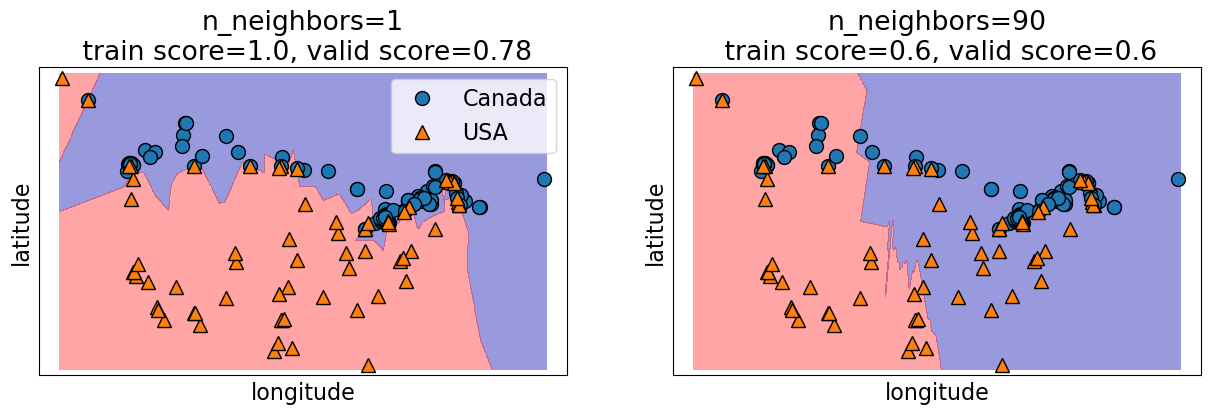

In [123]:
plot_knn_decision_boundaries(cities_X_train, cities_y_train, k_values=[1, 90])

If we plot these two models with $k=1$ on the left and $k=90$ on the right. 

The left plot shows a much more complex model where it is much more specific and attempts to get every example correct. 

The plot on right is plotting a simpler model and we can see more training examples are being predicted incorrectly. 

### How to choose $K$ (`n_neighbors`)?

So we saw the model was overfitting with $k$=1 and  when $k$=90, the model was underfitting.

So, the question is how do we pick $k$?

- Since $k$ is a hyperparameter (`n_neighbors` in `sklearn`), we can use hyperparameter optimization to choose $k$.

Here we are looping over different values of $k$ and performing cross-validation on each one.

In [124]:
results_dict = {"n_neighbors": list(), "mean_train_score": list(), "mean_cv_score": list()}

for k in range(1, 50, 5):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_validate(knn, cities_X_train, cities_y_train, cv=10, return_train_score=True)
    results_dict["n_neighbors"].append(k)
    results_dict["mean_cv_score"].append(np.mean(scores["test_score"]))
    results_dict["mean_train_score"].append(np.mean(scores["train_score"]))

results_df = pd.DataFrame(results_dict)
results_df

,n_neighbors,mean_train_score,mean_cv_score
0,1,1.000000,0.767647
1,6,0.841660,0.785662
2,11,0.823051,0.811029
3,16,0.807726,0.793382
4,21,0.777810,0.756985
5,26,0.765854,0.739338
6,31,0.758525,0.738971
7,36,0.738583,0.720221
8,41,0.725912,0.726471
9,46,0.733916,0.713971


In [125]:
plotting_source = results_df.melt(
    id_vars='n_neighbors',
    value_vars=['mean_train_score', 'mean_cv_score'],
    var_name='score_type',
    value_name='accuracy'
)

K_plot = alt.Chart(plotting_source, width=500, height=300).mark_line().encode(
    alt.X('n_neighbors:Q'),
    alt.Y('accuracy:Q', scale=alt.Scale(domain=[.67, 1.00])),
    alt.Color('score_type:N')
).properties(title="Accuracies of n_neighbors for KNeighborsClassifier")

K_plot

alt.Chart(...)

Looking at this graph with k on the x-axis and accuracy on the y-axis, we can see there is a sweet spot where the gap between the validation and training scores is the lowest and cross-validation score is the highest. Here it’s when `n_neighbors` is 11.

How do I know it's 11? 
Here's how! 

In [126]:
results_df.sort_values("mean_cv_score", ascending=False)

,n_neighbors,mean_train_score,mean_cv_score
2,11,0.823051,0.811029
3,16,0.807726,0.793382
1,6,0.841660,0.785662
0,1,1.000000,0.767647
4,21,0.777810,0.756985
5,26,0.765854,0.739338
6,31,0.758525,0.738971
8,41,0.725912,0.726471
7,36,0.738583,0.720221
9,46,0.733916,0.713971


In [127]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(cities_X_train, cities_y_train);
print("Test accuracy:", round(knn.score(cities_X_test, cities_y_test), 3))

Test accuracy: 0.857


This testing accuracy even higher than the validation mean accuracy we had earlier. 

## Curse of Dimensionality 

> $k$ -NN usually works well when the number of dimensions is small.

In the previous module, we discussed one of the most important problems in machine learning which was overfitting.
The second most important problem in machine learning is **the curse of dimensionality**.
This refers to that datasets with many many features generally have a sparser distribution of observations within this feature space,
since there are so many possible unique combinations of features.
This makes it both harder to detect the same general patterns between observations in the data
and easier to accidentally mistake "noise" (meaningless correlations) for general patterns.

We will talk more later about what can be done to alleviate the curse of dimensionality,
but for now it is enough to know that many supervised ML algorithms, including k-NN,
can perform poorly when there are too high dimensionality in the data.
With enough irrelevant features, the accidental similarity between features wipes out any meaningful similarity and $k$-NN is no better than random guessing.


## Let's Practice 

Consider this toy dataset:

$$ X = \begin{bmatrix}5 & 2\\4 & 3\\  2 & 2\\ 10 & 10\\ 9 & -1\\ 9& 9\end{bmatrix}, \quad y = \begin{bmatrix}A\\A\\B\\B\\B\\C\end{bmatrix}.$$

What would you predict for $x=\begin{bmatrix} 0 & 0\end{bmatrix}$:

1\. If $k=1$?    
2\. If $k=3$?     


**True or False**       

3\. The classification of the closest neighbour to the test example always contributes the most to the prediction.    
4\. The `n_neighbors` hyperparameter must be less than the number of examples in the training set.     
5\. Similar to decision trees, $k$-NNs find a small set of good features.     
6\. With  $k$-NN, setting the hyperparameter  $k$  to larger values typically increases training score.      
7\. $k$-NN may perform poorly in high-dimensional space (say, d > 100)     
8\. Based on the graph below, what value of `n_neighbors` would you choose to train your model on?    

<img src="imgs/Q18a.png"  width = "70%" alt="404 image" />



```{admonition} Solutions!
:class: dropdown

1. B
2. A
3. False
4. True   
5. False
6. False 
7. True
8. 12

```

## What We've Learned Today<a id="9"></a>

- The concept of baseline models.
- How to initiate a Dummy Classifier and Regressor.
- How to measure Euclidean distance.
- How the $k$NN algorithm works for classification.
- How changing $k$ (`n_neighbors`) affects a model.
- What the curse of dimensionality is.
